In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('E:\\Sliit\\4th yr 1st sem\\project\\2nd sem\\Weather prediction sensor data\\cleaned_dataset (1).csv')
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Press_kPa,Weather
0,1/1/2012 1:00,-1.8,-3.7,87,4,101.24,0
1,1/1/2012 2:00,-1.8,-3.4,89,7,101.26,1
2,1/1/2012 3:00,-1.5,-3.2,88,6,101.27,1
3,1/1/2012 4:00,-1.5,-3.3,88,7,101.23,0
4,1/1/2012 5:00,-1.4,-3.3,87,9,101.27,0
...,...,...,...,...,...,...,...
8323,12/31/2012 19:00,0.1,-2.7,81,30,100.13,8
8324,12/31/2012 20:00,0.2,-2.4,83,24,100.03,8
8325,12/31/2012 21:00,-0.5,-1.5,93,28,99.95,8
8326,12/31/2012 22:00,-0.2,-1.8,89,28,99.91,8


In [4]:
dataset=df.values
data=dataset[:,1:6]
target=dataset[:,6]

In [5]:
print(data.shape,target.shape)

(8328, 5) (8328,)


In [6]:
target

array([0, 1, 1, ..., 8, 8, 8], dtype=object)

In [7]:
#data normalization
from sklearn.preprocessing import MinMaxScaler
target=np.reshape(target, (-1,1)) 

scaler_data = MinMaxScaler()
scaler_target = MinMaxScaler()

scaler_data.fit(data)
scaler_target.fit(target)

data_scaled=scaler_data.transform(data)
target_scaled=scaler_target.transform(target)

E:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data)

In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled,test_size=0.2)

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np

model = Sequential()
model.add(Dense(128, input_dim=5, activation='sigmoid',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(9, activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 9)                 99        
                                                                 
Total params: 9773 (38.18 KB)
Trainable params: 9773 (38

In [11]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('models/model-{epoch:03d}.model',monitor='val_loss',save_best_only=True,mode='auto')

In [12]:
history=model.fit(train_data,train_target,epochs=200,validation_data=(test_data,test_target),callbacks=[checkpoint])

Epoch 1/200
208/209 [============================>.] - ETA: 0s - loss: 0.1655 - mse: 0.1655 - mae: 0.3194INFO:tensorflow:Assets written to: models\model-001.model\assets


INFO:tensorflow:Assets written to: models\model-001.model\assets


209/209 [==============================] - 9s 21ms/step - loss: 0.1655 - mse: 0.1655 - mae: 0.3193 - val_loss: 0.0860 - val_mse: 0.0860 - val_mae: 0.2580
Epoch 2/200
202/209 [===========================>..] - ETA: 0s - loss: 0.0855 - mse: 0.0855 - mae: 0.2595INFO:tensorflow:Assets written to: models\model-002.model\assets


INFO:tensorflow:Assets written to: models\model-002.model\assets


209/209 [==============================] - 3s 15ms/step - loss: 0.0854 - mse: 0.0854 - mae: 0.2592 - val_loss: 0.0833 - val_mse: 0.0833 - val_mae: 0.2574
Epoch 3/200
204/209 [============================>.] - ETA: 0s - loss: 0.0844 - mse: 0.0844 - mae: 0.2594INFO:tensorflow:Assets written to: models\model-003.model\assets


INFO:tensorflow:Assets written to: models\model-003.model\assets


209/209 [==============================] - 3s 13ms/step - loss: 0.0843 - mse: 0.0843 - mae: 0.2592 - val_loss: 0.0832 - val_mse: 0.0832 - val_mae: 0.2574
Epoch 4/200
209/209 [==============================] - 1s 6ms/step - loss: 0.0840 - mse: 0.0840 - mae: 0.2592 - val_loss: 0.0833 - val_mse: 0.0833 - val_mae: 0.2575
Epoch 5/200
201/209 [===========================>..] - ETA: 0s - loss: 0.0836 - mse: 0.0836 - mae: 0.2584INFO:tensorflow:Assets written to: models\model-005.model\assets


INFO:tensorflow:Assets written to: models\model-005.model\assets


209/209 [==============================] - 3s 15ms/step - loss: 0.0839 - mse: 0.0839 - mae: 0.2591 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2573
Epoch 6/200
209/209 [==============================] - 1s 5ms/step - loss: 0.0837 - mse: 0.0837 - mae: 0.2590 - val_loss: 0.0834 - val_mse: 0.0834 - val_mae: 0.2575
Epoch 7/200
209/209 [==============================] - 1s 6ms/step - loss: 0.0837 - mse: 0.0837 - mae: 0.2589 - val_loss: 0.0838 - val_mse: 0.0838 - val_mae: 0.2576
Epoch 8/200
203/209 [============================>.] - ETA: 0s - loss: 0.0836 - mse: 0.0836 - mae: 0.2590INFO:tensorflow:Assets written to: models\model-008.model\assets


INFO:tensorflow:Assets written to: models\model-008.model\assets


209/209 [==============================] - 3s 14ms/step - loss: 0.0837 - mse: 0.0837 - mae: 0.2591 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2573
Epoch 9/200
209/209 [==============================] - 1s 6ms/step - loss: 0.0837 - mse: 0.0837 - mae: 0.2592 - val_loss: 0.0832 - val_mse: 0.0832 - val_mae: 0.2574
Epoch 10/200
209/209 [==============================] - 1s 6ms/step - loss: 0.0836 - mse: 0.0836 - mae: 0.2592 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2574
Epoch 11/200
209/209 [==============================] - 1s 5ms/step - loss: 0.0836 - mse: 0.0836 - mae: 0.2592 - val_loss: 0.0832 - val_mse: 0.0832 - val_mae: 0.2575
Epoch 12/200
197/209 [===========================>..] - ETA: 0s - loss: 0.0838 - mse: 0.0838 - mae: 0.2594INFO:tensorflow:Assets written to: models\model-012.model\assets


INFO:tensorflow:Assets written to: models\model-012.model\assets


209/209 [==============================] - 3s 16ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2591 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2573
Epoch 13/200
209/209 [==============================] - 1s 7ms/step - loss: 0.0837 - mse: 0.0837 - mae: 0.2589 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2573
Epoch 14/200
209/209 [==============================] - ETA: 0s - loss: 0.0835 - mse: 0.0835 - mae: 0.2589INFO:tensorflow:Assets written to: models\model-014.model\assets


INFO:tensorflow:Assets written to: models\model-014.model\assets


209/209 [==============================] - 3s 15ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2589 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2573
Epoch 15/200
209/209 [==============================] - 1s 6ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2590 - val_loss: 0.0839 - val_mse: 0.0839 - val_mae: 0.2576
Epoch 16/200
207/209 [============================>.] - ETA: 0s - loss: 0.0836 - mse: 0.0836 - mae: 0.2590INFO:tensorflow:Assets written to: models\model-016.model\assets


INFO:tensorflow:Assets written to: models\model-016.model\assets


209/209 [==============================] - 3s 14ms/step - loss: 0.0836 - mse: 0.0836 - mae: 0.2590 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2573
Epoch 17/200
209/209 [==============================] - 1s 6ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2591 - val_loss: 0.0832 - val_mse: 0.0832 - val_mae: 0.2574
Epoch 18/200
209/209 [==============================] - 1s 6ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2590 - val_loss: 0.0835 - val_mse: 0.0835 - val_mae: 0.2576
Epoch 19/200
209/209 [==============================] - 1s 6ms/step - loss: 0.0836 - mse: 0.0836 - mae: 0.2589 - val_loss: 0.0834 - val_mse: 0.0834 - val_mae: 0.2575
Epoch 20/200
209/209 [==============================] - 1s 6ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2588 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2573
Epoch 21/200
209/209 [==============================] - 1s 5ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2591 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2574
Epoch 22/200
209

INFO:tensorflow:Assets written to: models\model-024.model\assets


209/209 [==============================] - 3s 15ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2591 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2573
Epoch 25/200
209/209 [==============================] - 1s 7ms/step - loss: 0.0836 - mse: 0.0836 - mae: 0.2591 - val_loss: 0.0833 - val_mse: 0.0833 - val_mae: 0.2575
Epoch 26/200
209/209 [==============================] - 1s 6ms/step - loss: 0.0836 - mse: 0.0836 - mae: 0.2590 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2574
Epoch 27/200
209/209 [==============================] - 1s 5ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2589 - val_loss: 0.0838 - val_mse: 0.0838 - val_mae: 0.2576
Epoch 28/200
209/209 [==============================] - 1s 6ms/step - loss: 0.0836 - mse: 0.0836 - mae: 0.2590 - val_loss: 0.0832 - val_mse: 0.0832 - val_mae: 0.2572
Epoch 29/200
209/209 [==============================] - 3s 16ms/step - loss: 0.0836 - mse: 0.0836 - mae: 0.2592 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2574
Epoch 30/200
20

INFO:tensorflow:Assets written to: models\model-042.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2591 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2574
Epoch 43/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2591 - val_loss: 0.0834 - val_mse: 0.0834 - val_mae: 0.2575
Epoch 44/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0836 - mse: 0.0836 - mae: 0.2590 - val_loss: 0.0832 - val_mse: 0.0832 - val_mae: 0.2573
Epoch 45/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0836 - mse: 0.0836 - mae: 0.2591 - val_loss: 0.0833 - val_mse: 0.0833 - val_mae: 0.2575
Epoch 46/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2590 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2573
Epoch 47/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2591 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2573
Epoch 48/200
209/

INFO:tensorflow:Assets written to: models\model-069.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2591 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2573
Epoch 70/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0836 - mse: 0.0836 - mae: 0.2592 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2574
Epoch 71/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2591 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2573
Epoch 72/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2590 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2574
Epoch 73/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0836 - mse: 0.0836 - mae: 0.2591 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2574
Epoch 74/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2591 - val_loss: 0.0832 - val_mse: 0.0832 - val_mae: 0.2575
Epoch 75/200
209/

INFO:tensorflow:Assets written to: models\model-078.model\assets


209/209 [==============================] - 2s 7ms/step - loss: 0.0835 - mse: 0.0835 - mae: 0.2591 - val_loss: 0.0831 - val_mse: 0.0831 - val_mae: 0.2573
Epoch 79/200
189/209 [==========================>...] - ETA: 0s - loss: 0.0838 - mse: 0.0838 - mae: 0.2591INFO:tensorflow:Assets written to: models\model-079.model\assets


INFO:tensorflow:Assets written to: models\model-079.model\assets


209/209 [==============================] - 2s 7ms/step - loss: 0.0831 - mse: 0.0831 - mae: 0.2581 - val_loss: 0.0824 - val_mse: 0.0824 - val_mae: 0.2563
Epoch 80/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0833 - mse: 0.0833 - mae: 0.2581 - val_loss: 0.0828 - val_mse: 0.0828 - val_mae: 0.2568
Epoch 81/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0830 - mse: 0.0830 - mae: 0.2575 - val_loss: 0.0826 - val_mse: 0.0826 - val_mae: 0.2564
Epoch 82/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0830 - mse: 0.0830 - mae: 0.2574 - val_loss: 0.0826 - val_mse: 0.0826 - val_mae: 0.2562
Epoch 83/200
202/209 [===========================>..] - ETA: 0s - loss: 0.0826 - mse: 0.0826 - mae: 0.2564INFO:tensorflow:Assets written to: models\model-083.model\assets


INFO:tensorflow:Assets written to: models\model-083.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0828 - mse: 0.0828 - mae: 0.2568 - val_loss: 0.0820 - val_mse: 0.0820 - val_mae: 0.2556
Epoch 84/200
185/209 [=========================>....] - ETA: 0s - loss: 0.0830 - mse: 0.0830 - mae: 0.2575INFO:tensorflow:Assets written to: models\model-084.model\assets


INFO:tensorflow:Assets written to: models\model-084.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0826 - mse: 0.0826 - mae: 0.2564 - val_loss: 0.0816 - val_mse: 0.0816 - val_mae: 0.2546
Epoch 85/200
202/209 [===========================>..] - ETA: 0s - loss: 0.0824 - mse: 0.0824 - mae: 0.2556INFO:tensorflow:Assets written to: models\model-085.model\assets


INFO:tensorflow:Assets written to: models\model-085.model\assets


209/209 [==============================] - 2s 9ms/step - loss: 0.0824 - mse: 0.0824 - mae: 0.2558 - val_loss: 0.0812 - val_mse: 0.0812 - val_mae: 0.2540
Epoch 86/200
201/209 [===========================>..] - ETA: 0s - loss: 0.0820 - mse: 0.0820 - mae: 0.2548INFO:tensorflow:Assets written to: models\model-086.model\assets


INFO:tensorflow:Assets written to: models\model-086.model\assets


209/209 [==============================] - 2s 7ms/step - loss: 0.0820 - mse: 0.0820 - mae: 0.2548 - val_loss: 0.0810 - val_mse: 0.0810 - val_mae: 0.2531
Epoch 87/200
205/209 [============================>.] - ETA: 0s - loss: 0.0819 - mse: 0.0819 - mae: 0.2546INFO:tensorflow:Assets written to: models\model-087.model\assets


INFO:tensorflow:Assets written to: models\model-087.model\assets


209/209 [==============================] - 1s 7ms/step - loss: 0.0818 - mse: 0.0818 - mae: 0.2546 - val_loss: 0.0807 - val_mse: 0.0807 - val_mae: 0.2521
Epoch 88/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0815 - mse: 0.0815 - mae: 0.2536 - val_loss: 0.0811 - val_mse: 0.0811 - val_mae: 0.2520
Epoch 89/200
199/209 [===========================>..] - ETA: 0s - loss: 0.0810 - mse: 0.0810 - mae: 0.2527INFO:tensorflow:Assets written to: models\model-089.model\assets


INFO:tensorflow:Assets written to: models\model-089.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0813 - mse: 0.0813 - mae: 0.2532 - val_loss: 0.0805 - val_mse: 0.0805 - val_mae: 0.2513
Epoch 90/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0817 - mse: 0.0817 - mae: 0.2534 - val_loss: 0.0807 - val_mse: 0.0807 - val_mae: 0.2517
Epoch 91/200
197/209 [===========================>..] - ETA: 0s - loss: 0.0815 - mse: 0.0815 - mae: 0.2532INFO:tensorflow:Assets written to: models\model-091.model\assets


INFO:tensorflow:Assets written to: models\model-091.model\assets


209/209 [==============================] - 2s 7ms/step - loss: 0.0814 - mse: 0.0814 - mae: 0.2531 - val_loss: 0.0804 - val_mse: 0.0804 - val_mae: 0.2511
Epoch 92/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0814 - mse: 0.0814 - mae: 0.2530 - val_loss: 0.0805 - val_mse: 0.0805 - val_mae: 0.2516
Epoch 93/200
203/209 [============================>.] - ETA: 0s - loss: 0.0815 - mse: 0.0815 - mae: 0.2535INFO:tensorflow:Assets written to: models\model-093.model\assets


INFO:tensorflow:Assets written to: models\model-093.model\assets


209/209 [==============================] - 2s 7ms/step - loss: 0.0816 - mse: 0.0816 - mae: 0.2535 - val_loss: 0.0804 - val_mse: 0.0804 - val_mae: 0.2510
Epoch 94/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0811 - mse: 0.0811 - mae: 0.2521 - val_loss: 0.0808 - val_mse: 0.0808 - val_mae: 0.2513
Epoch 95/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0811 - mse: 0.0811 - mae: 0.2521 - val_loss: 0.0812 - val_mse: 0.0812 - val_mae: 0.2512
Epoch 96/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0813 - mse: 0.0813 - mae: 0.2526 - val_loss: 0.0811 - val_mse: 0.0811 - val_mae: 0.2508
Epoch 97/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0814 - mse: 0.0814 - mae: 0.2528 - val_loss: 0.0816 - val_mse: 0.0816 - val_mae: 0.2514
Epoch 98/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0811 - mse: 0.0811 - mae: 0.2524 - val_loss: 0.0809 - val_mse: 0.0809 - val_mae: 0.2507
Epoch 99/200
198/

INFO:tensorflow:Assets written to: models\model-099.model\assets


209/209 [==============================] - 2s 9ms/step - loss: 0.0808 - mse: 0.0808 - mae: 0.2508 - val_loss: 0.0801 - val_mse: 0.0801 - val_mae: 0.2501
Epoch 100/200
186/209 [=========================>....] - ETA: 0s - loss: 0.0806 - mse: 0.0806 - mae: 0.2509INFO:tensorflow:Assets written to: models\model-100.model\assets


INFO:tensorflow:Assets written to: models\model-100.model\assets


209/209 [==============================] - 2s 7ms/step - loss: 0.0806 - mse: 0.0806 - mae: 0.2510 - val_loss: 0.0801 - val_mse: 0.0801 - val_mae: 0.2500
Epoch 101/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0807 - mse: 0.0807 - mae: 0.2517 - val_loss: 0.0802 - val_mse: 0.0802 - val_mae: 0.2494
Epoch 102/200
203/209 [============================>.] - ETA: 0s - loss: 0.0804 - mse: 0.0804 - mae: 0.2499INFO:tensorflow:Assets written to: models\model-102.model\assets


INFO:tensorflow:Assets written to: models\model-102.model\assets


209/209 [==============================] - 2s 7ms/step - loss: 0.0805 - mse: 0.0805 - mae: 0.2501 - val_loss: 0.0800 - val_mse: 0.0800 - val_mae: 0.2493
Epoch 103/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0810 - mse: 0.0810 - mae: 0.2515 - val_loss: 0.0800 - val_mse: 0.0800 - val_mae: 0.2495
Epoch 104/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0808 - mse: 0.0808 - mae: 0.2513 - val_loss: 0.0800 - val_mse: 0.0800 - val_mae: 0.2500
Epoch 105/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0810 - mse: 0.0810 - mae: 0.2518 - val_loss: 0.0805 - val_mse: 0.0805 - val_mae: 0.2496
Epoch 106/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0805 - mse: 0.0805 - mae: 0.2505 - val_loss: 0.0800 - val_mse: 0.0800 - val_mae: 0.2496
Epoch 107/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0807 - mse: 0.0807 - mae: 0.2504 - val_loss: 0.0804 - val_mse: 0.0804 - val_mae: 0.2497
Epoch 108/20

INFO:tensorflow:Assets written to: models\model-108.model\assets


209/209 [==============================] - 1s 7ms/step - loss: 0.0807 - mse: 0.0807 - mae: 0.2509 - val_loss: 0.0799 - val_mse: 0.0799 - val_mae: 0.2489
Epoch 109/200
209/209 [==============================] - ETA: 0s - loss: 0.0804 - mse: 0.0804 - mae: 0.2502INFO:tensorflow:Assets written to: models\model-109.model\assets


INFO:tensorflow:Assets written to: models\model-109.model\assets


209/209 [==============================] - 2s 7ms/step - loss: 0.0804 - mse: 0.0804 - mae: 0.2502 - val_loss: 0.0798 - val_mse: 0.0798 - val_mae: 0.2486
Epoch 110/200
198/209 [===========================>..] - ETA: 0s - loss: 0.0804 - mse: 0.0804 - mae: 0.2497INFO:tensorflow:Assets written to: models\model-110.model\assets


INFO:tensorflow:Assets written to: models\model-110.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0804 - mse: 0.0804 - mae: 0.2498 - val_loss: 0.0798 - val_mse: 0.0798 - val_mae: 0.2482
Epoch 111/200
198/209 [===========================>..] - ETA: 0s - loss: 0.0800 - mse: 0.0800 - mae: 0.2491INFO:tensorflow:Assets written to: models\model-111.model\assets


INFO:tensorflow:Assets written to: models\model-111.model\assets


209/209 [==============================] - 2s 7ms/step - loss: 0.0800 - mse: 0.0800 - mae: 0.2490 - val_loss: 0.0797 - val_mse: 0.0797 - val_mae: 0.2475
Epoch 112/200
209/209 [==============================] - 1s 4ms/step - loss: 0.0804 - mse: 0.0804 - mae: 0.2496 - val_loss: 0.0798 - val_mse: 0.0798 - val_mae: 0.2479
Epoch 113/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0806 - mse: 0.0806 - mae: 0.2500 - val_loss: 0.0798 - val_mse: 0.0798 - val_mae: 0.2484
Epoch 114/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0804 - mse: 0.0804 - mae: 0.2500 - val_loss: 0.0800 - val_mse: 0.0800 - val_mae: 0.2485
Epoch 115/200
201/209 [===========================>..] - ETA: 0s - loss: 0.0799 - mse: 0.0799 - mae: 0.2490INFO:tensorflow:Assets written to: models\model-115.model\assets


INFO:tensorflow:Assets written to: models\model-115.model\assets


209/209 [==============================] - 2s 9ms/step - loss: 0.0802 - mse: 0.0802 - mae: 0.2493 - val_loss: 0.0796 - val_mse: 0.0796 - val_mae: 0.2475
Epoch 116/200
196/209 [===========================>..] - ETA: 0s - loss: 0.0798 - mse: 0.0798 - mae: 0.2489INFO:tensorflow:Assets written to: models\model-116.model\assets


INFO:tensorflow:Assets written to: models\model-116.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0800 - mse: 0.0800 - mae: 0.2493 - val_loss: 0.0795 - val_mse: 0.0795 - val_mae: 0.2471
Epoch 117/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0805 - mse: 0.0805 - mae: 0.2496 - val_loss: 0.0802 - val_mse: 0.0802 - val_mae: 0.2484
Epoch 118/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0803 - mse: 0.0803 - mae: 0.2495 - val_loss: 0.0796 - val_mse: 0.0796 - val_mae: 0.2483
Epoch 119/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0806 - mse: 0.0806 - mae: 0.2502 - val_loss: 0.0796 - val_mse: 0.0796 - val_mae: 0.2480
Epoch 120/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0804 - mse: 0.0804 - mae: 0.2497 - val_loss: 0.0796 - val_mse: 0.0796 - val_mae: 0.2478
Epoch 121/200
207/209 [============================>.] - ETA: 0s - loss: 0.0798 - mse: 0.0798 - mae: 0.2485INFO:tensorflow:Assets written to: models\model-121.model\assets


INFO:tensorflow:Assets written to: models\model-121.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0798 - mse: 0.0798 - mae: 0.2485 - val_loss: 0.0795 - val_mse: 0.0795 - val_mae: 0.2472
Epoch 122/200
200/209 [===========================>..] - ETA: 0s - loss: 0.0804 - mse: 0.0804 - mae: 0.2492INFO:tensorflow:Assets written to: models\model-122.model\assets


INFO:tensorflow:Assets written to: models\model-122.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0801 - mse: 0.0801 - mae: 0.2488 - val_loss: 0.0795 - val_mse: 0.0795 - val_mae: 0.2474
Epoch 123/200
208/209 [============================>.] - ETA: 0s - loss: 0.0799 - mse: 0.0799 - mae: 0.2482INFO:tensorflow:Assets written to: models\model-123.model\assets


INFO:tensorflow:Assets written to: models\model-123.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0798 - mse: 0.0798 - mae: 0.2480 - val_loss: 0.0793 - val_mse: 0.0793 - val_mae: 0.2467
Epoch 124/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0801 - mse: 0.0801 - mae: 0.2486 - val_loss: 0.0797 - val_mse: 0.0797 - val_mae: 0.2475
Epoch 125/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0799 - mse: 0.0799 - mae: 0.2484 - val_loss: 0.0806 - val_mse: 0.0806 - val_mae: 0.2478
Epoch 126/200
198/209 [===========================>..] - ETA: 0s - loss: 0.0803 - mse: 0.0803 - mae: 0.2484INFO:tensorflow:Assets written to: models\model-126.model\assets


INFO:tensorflow:Assets written to: models\model-126.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0802 - mse: 0.0802 - mae: 0.2482 - val_loss: 0.0793 - val_mse: 0.0793 - val_mae: 0.2469
Epoch 127/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0799 - mse: 0.0799 - mae: 0.2486 - val_loss: 0.0793 - val_mse: 0.0793 - val_mae: 0.2467
Epoch 128/200
202/209 [===========================>..] - ETA: 0s - loss: 0.0793 - mse: 0.0793 - mae: 0.2469INFO:tensorflow:Assets written to: models\model-128.model\assets


INFO:tensorflow:Assets written to: models\model-128.model\assets


209/209 [==============================] - 2s 9ms/step - loss: 0.0795 - mse: 0.0795 - mae: 0.2473 - val_loss: 0.0791 - val_mse: 0.0791 - val_mae: 0.2457
Epoch 129/200
209/209 [==============================] - 1s 4ms/step - loss: 0.0802 - mse: 0.0802 - mae: 0.2484 - val_loss: 0.0792 - val_mse: 0.0792 - val_mae: 0.2468
Epoch 130/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0798 - mse: 0.0798 - mae: 0.2481 - val_loss: 0.0794 - val_mse: 0.0794 - val_mae: 0.2460
Epoch 131/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0799 - mse: 0.0799 - mae: 0.2476 - val_loss: 0.0792 - val_mse: 0.0792 - val_mae: 0.2463
Epoch 132/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0799 - mse: 0.0799 - mae: 0.2482 - val_loss: 0.0793 - val_mse: 0.0793 - val_mae: 0.2462
Epoch 133/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0800 - mse: 0.0800 - mae: 0.2483 - val_loss: 0.0792 - val_mse: 0.0792 - val_mae: 0.2460
Epoch 134/20

INFO:tensorflow:Assets written to: models\model-134.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0801 - mse: 0.0801 - mae: 0.2487 - val_loss: 0.0791 - val_mse: 0.0791 - val_mae: 0.2463
Epoch 135/200
191/209 [==========================>...] - ETA: 0s - loss: 0.0794 - mse: 0.0794 - mae: 0.2471INFO:tensorflow:Assets written to: models\model-135.model\assets


INFO:tensorflow:Assets written to: models\model-135.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0793 - mse: 0.0793 - mae: 0.2471 - val_loss: 0.0790 - val_mse: 0.0790 - val_mae: 0.2447
Epoch 136/200
194/209 [==========================>...] - ETA: 0s - loss: 0.0796 - mse: 0.0796 - mae: 0.2470INFO:tensorflow:Assets written to: models\model-136.model\assets


INFO:tensorflow:Assets written to: models\model-136.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0797 - mse: 0.0797 - mae: 0.2473 - val_loss: 0.0789 - val_mse: 0.0789 - val_mae: 0.2456
Epoch 137/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0799 - mse: 0.0799 - mae: 0.2477 - val_loss: 0.0791 - val_mse: 0.0791 - val_mae: 0.2456
Epoch 138/200
194/209 [==========================>...] - ETA: 0s - loss: 0.0796 - mse: 0.0796 - mae: 0.2472INFO:tensorflow:Assets written to: models\model-138.model\assets


INFO:tensorflow:Assets written to: models\model-138.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0793 - mse: 0.0793 - mae: 0.2468 - val_loss: 0.0789 - val_mse: 0.0789 - val_mae: 0.2455
Epoch 139/200
192/209 [==========================>...] - ETA: 0s - loss: 0.0787 - mse: 0.0787 - mae: 0.2458INFO:tensorflow:Assets written to: models\model-139.model\assets


INFO:tensorflow:Assets written to: models\model-139.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0792 - mse: 0.0792 - mae: 0.2463 - val_loss: 0.0788 - val_mse: 0.0788 - val_mae: 0.2445
Epoch 140/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0794 - mse: 0.0794 - mae: 0.2469 - val_loss: 0.0790 - val_mse: 0.0790 - val_mae: 0.2458
Epoch 141/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0795 - mse: 0.0795 - mae: 0.2469 - val_loss: 0.0789 - val_mse: 0.0789 - val_mae: 0.2450
Epoch 142/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0795 - mse: 0.0795 - mae: 0.2467 - val_loss: 0.0792 - val_mse: 0.0792 - val_mae: 0.2459
Epoch 143/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0799 - mse: 0.0799 - mae: 0.2478 - val_loss: 0.0788 - val_mse: 0.0788 - val_mae: 0.2452
Epoch 144/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0797 - mse: 0.0797 - mae: 0.2478 - val_loss: 0.0790 - val_mse: 0.0790 - val_mae: 0.2454
Epoch 145/20

INFO:tensorflow:Assets written to: models\model-145.model\assets


209/209 [==============================] - 2s 7ms/step - loss: 0.0795 - mse: 0.0795 - mae: 0.2470 - val_loss: 0.0787 - val_mse: 0.0787 - val_mae: 0.2451
Epoch 146/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0792 - mse: 0.0792 - mae: 0.2457 - val_loss: 0.0788 - val_mse: 0.0788 - val_mae: 0.2464
Epoch 147/200
188/209 [=========================>....] - ETA: 0s - loss: 0.0794 - mse: 0.0794 - mae: 0.2470INFO:tensorflow:Assets written to: models\model-147.model\assets


INFO:tensorflow:Assets written to: models\model-147.model\assets


209/209 [==============================] - 2s 9ms/step - loss: 0.0791 - mse: 0.0791 - mae: 0.2463 - val_loss: 0.0787 - val_mse: 0.0787 - val_mae: 0.2444
Epoch 148/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0794 - mse: 0.0794 - mae: 0.2469 - val_loss: 0.0789 - val_mse: 0.0789 - val_mae: 0.2450
Epoch 149/200
198/209 [===========================>..] - ETA: 0s - loss: 0.0787 - mse: 0.0787 - mae: 0.2450INFO:tensorflow:Assets written to: models\model-149.model\assets


INFO:tensorflow:Assets written to: models\model-149.model\assets


209/209 [==============================] - 2s 10ms/step - loss: 0.0790 - mse: 0.0790 - mae: 0.2458 - val_loss: 0.0786 - val_mse: 0.0786 - val_mae: 0.2437
Epoch 150/200
209/209 [==============================] - 1s 4ms/step - loss: 0.0797 - mse: 0.0797 - mae: 0.2473 - val_loss: 0.0791 - val_mse: 0.0791 - val_mae: 0.2462
Epoch 151/200
209/209 [==============================] - 1s 4ms/step - loss: 0.0798 - mse: 0.0798 - mae: 0.2472 - val_loss: 0.0791 - val_mse: 0.0791 - val_mae: 0.2459
Epoch 152/200
200/209 [===========================>..] - ETA: 0s - loss: 0.0790 - mse: 0.0790 - mae: 0.2464INFO:tensorflow:Assets written to: models\model-152.model\assets


INFO:tensorflow:Assets written to: models\model-152.model\assets


209/209 [==============================] - 2s 9ms/step - loss: 0.0789 - mse: 0.0789 - mae: 0.2461 - val_loss: 0.0786 - val_mse: 0.0786 - val_mae: 0.2451
Epoch 153/200
195/209 [==========================>...] - ETA: 0s - loss: 0.0790 - mse: 0.0790 - mae: 0.2455INFO:tensorflow:Assets written to: models\model-153.model\assets


INFO:tensorflow:Assets written to: models\model-153.model\assets


209/209 [==============================] - 2s 7ms/step - loss: 0.0792 - mse: 0.0792 - mae: 0.2458 - val_loss: 0.0785 - val_mse: 0.0785 - val_mae: 0.2440
Epoch 154/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0795 - mse: 0.0795 - mae: 0.2465 - val_loss: 0.0786 - val_mse: 0.0786 - val_mae: 0.2456
Epoch 155/200
209/209 [==============================] - 1s 2ms/step - loss: 0.0791 - mse: 0.0791 - mae: 0.2458 - val_loss: 0.0786 - val_mse: 0.0786 - val_mae: 0.2444
Epoch 156/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0795 - mse: 0.0795 - mae: 0.2470 - val_loss: 0.0786 - val_mse: 0.0786 - val_mae: 0.2449
Epoch 157/200
206/209 [============================>.] - ETA: 0s - loss: 0.0790 - mse: 0.0790 - mae: 0.2460INFO:tensorflow:Assets written to: models\model-157.model\assets


INFO:tensorflow:Assets written to: models\model-157.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0791 - mse: 0.0791 - mae: 0.2462 - val_loss: 0.0785 - val_mse: 0.0785 - val_mae: 0.2439
Epoch 158/200
206/209 [============================>.] - ETA: 0s - loss: 0.0791 - mse: 0.0791 - mae: 0.2459INFO:tensorflow:Assets written to: models\model-158.model\assets


INFO:tensorflow:Assets written to: models\model-158.model\assets


209/209 [==============================] - 2s 7ms/step - loss: 0.0790 - mse: 0.0790 - mae: 0.2457 - val_loss: 0.0784 - val_mse: 0.0784 - val_mae: 0.2444
Epoch 159/200
201/209 [===========================>..] - ETA: 0s - loss: 0.0789 - mse: 0.0789 - mae: 0.2446INFO:tensorflow:Assets written to: models\model-159.model\assets


INFO:tensorflow:Assets written to: models\model-159.model\assets


209/209 [==============================] - 2s 7ms/step - loss: 0.0788 - mse: 0.0788 - mae: 0.2444 - val_loss: 0.0783 - val_mse: 0.0783 - val_mae: 0.2433
Epoch 160/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0791 - mse: 0.0791 - mae: 0.2455 - val_loss: 0.0790 - val_mse: 0.0790 - val_mae: 0.2452
Epoch 161/200
208/209 [============================>.] - ETA: 0s - loss: 0.0787 - mse: 0.0787 - mae: 0.2449INFO:tensorflow:Assets written to: models\model-161.model\assets


INFO:tensorflow:Assets written to: models\model-161.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0787 - mse: 0.0787 - mae: 0.2449 - val_loss: 0.0783 - val_mse: 0.0783 - val_mae: 0.2434
Epoch 162/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0790 - mse: 0.0790 - mae: 0.2450 - val_loss: 0.0786 - val_mse: 0.0786 - val_mae: 0.2447
Epoch 163/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0796 - mse: 0.0796 - mae: 0.2465 - val_loss: 0.0785 - val_mse: 0.0785 - val_mae: 0.2447
Epoch 164/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0784 - mse: 0.0784 - mae: 0.2444 - val_loss: 0.0783 - val_mse: 0.0783 - val_mae: 0.2421
Epoch 165/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0789 - mse: 0.0789 - mae: 0.2449 - val_loss: 0.0783 - val_mse: 0.0783 - val_mae: 0.2419
Epoch 166/200
196/209 [===========================>..] - ETA: 0s - loss: 0.0790 - mse: 0.0790 - mae: 0.2449INFO:tensorflow:Assets written to: models\model-166.model\assets


INFO:tensorflow:Assets written to: models\model-166.model\assets


209/209 [==============================] - 1s 7ms/step - loss: 0.0792 - mse: 0.0792 - mae: 0.2450 - val_loss: 0.0783 - val_mse: 0.0783 - val_mae: 0.2441
Epoch 167/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0789 - mse: 0.0789 - mae: 0.2449 - val_loss: 0.0784 - val_mse: 0.0784 - val_mae: 0.2433
Epoch 168/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0788 - mse: 0.0788 - mae: 0.2445 - val_loss: 0.0784 - val_mse: 0.0784 - val_mae: 0.2437
Epoch 169/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0784 - mse: 0.0784 - mae: 0.2439 - val_loss: 0.0784 - val_mse: 0.0784 - val_mae: 0.2446
Epoch 170/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0789 - mse: 0.0789 - mae: 0.2451 - val_loss: 0.0783 - val_mse: 0.0783 - val_mae: 0.2434
Epoch 171/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0790 - mse: 0.0790 - mae: 0.2449 - val_loss: 0.0784 - val_mse: 0.0784 - val_mae: 0.2443
Epoch 172/20

INFO:tensorflow:Assets written to: models\model-172.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0790 - mse: 0.0790 - mae: 0.2451 - val_loss: 0.0782 - val_mse: 0.0782 - val_mae: 0.2435
Epoch 173/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0789 - mse: 0.0789 - mae: 0.2449 - val_loss: 0.0783 - val_mse: 0.0783 - val_mae: 0.2432
Epoch 174/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0788 - mse: 0.0788 - mae: 0.2449 - val_loss: 0.0782 - val_mse: 0.0782 - val_mae: 0.2436
Epoch 175/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0788 - mse: 0.0788 - mae: 0.2449 - val_loss: 0.0782 - val_mse: 0.0782 - val_mae: 0.2438
Epoch 176/200
189/209 [==========================>...] - ETA: 0s - loss: 0.0782 - mse: 0.0782 - mae: 0.2435INFO:tensorflow:Assets written to: models\model-176.model\assets


INFO:tensorflow:Assets written to: models\model-176.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0787 - mse: 0.0787 - mae: 0.2443 - val_loss: 0.0782 - val_mse: 0.0782 - val_mae: 0.2430
Epoch 177/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0786 - mse: 0.0786 - mae: 0.2443 - val_loss: 0.0785 - val_mse: 0.0785 - val_mae: 0.2431
Epoch 178/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0785 - mse: 0.0785 - mae: 0.2439 - val_loss: 0.0786 - val_mse: 0.0786 - val_mae: 0.2447
Epoch 179/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0786 - mse: 0.0786 - mae: 0.2437 - val_loss: 0.0782 - val_mse: 0.0782 - val_mae: 0.2430
Epoch 180/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0789 - mse: 0.0789 - mae: 0.2440 - val_loss: 0.0790 - val_mse: 0.0790 - val_mae: 0.2448
Epoch 181/200
203/209 [============================>.] - ETA: 0s - loss: 0.0784 - mse: 0.0784 - mae: 0.2443INFO:tensorflow:Assets written to: models\model-181.model\assets


INFO:tensorflow:Assets written to: models\model-181.model\assets


209/209 [==============================] - 2s 7ms/step - loss: 0.0786 - mse: 0.0786 - mae: 0.2446 - val_loss: 0.0781 - val_mse: 0.0781 - val_mae: 0.2423
Epoch 182/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0789 - mse: 0.0789 - mae: 0.2444 - val_loss: 0.0782 - val_mse: 0.0782 - val_mae: 0.2439
Epoch 183/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0787 - mse: 0.0787 - mae: 0.2438 - val_loss: 0.0781 - val_mse: 0.0781 - val_mae: 0.2431
Epoch 184/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0789 - mse: 0.0789 - mae: 0.2451 - val_loss: 0.0781 - val_mse: 0.0781 - val_mae: 0.2428
Epoch 185/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0789 - mse: 0.0789 - mae: 0.2447 - val_loss: 0.0782 - val_mse: 0.0782 - val_mae: 0.2426
Epoch 186/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0786 - mse: 0.0786 - mae: 0.2440 - val_loss: 0.0781 - val_mse: 0.0781 - val_mae: 0.2431
Epoch 187/20

INFO:tensorflow:Assets written to: models\model-191.model\assets


209/209 [==============================] - 2s 8ms/step - loss: 0.0784 - mse: 0.0784 - mae: 0.2437 - val_loss: 0.0780 - val_mse: 0.0780 - val_mae: 0.2433
Epoch 192/200
198/209 [===========================>..] - ETA: 0s - loss: 0.0781 - mse: 0.0781 - mae: 0.2429INFO:tensorflow:Assets written to: models\model-192.model\assets


INFO:tensorflow:Assets written to: models\model-192.model\assets


209/209 [==============================] - 2s 9ms/step - loss: 0.0785 - mse: 0.0785 - mae: 0.2435 - val_loss: 0.0780 - val_mse: 0.0780 - val_mae: 0.2431
Epoch 193/200
207/209 [============================>.] - ETA: 0s - loss: 0.0781 - mse: 0.0781 - mae: 0.2435INFO:tensorflow:Assets written to: models\model-193.model\assets


INFO:tensorflow:Assets written to: models\model-193.model\assets


209/209 [==============================] - 2s 9ms/step - loss: 0.0781 - mse: 0.0781 - mae: 0.2436 - val_loss: 0.0780 - val_mse: 0.0780 - val_mae: 0.2422
Epoch 194/200
203/209 [============================>.] - ETA: 0s - loss: 0.0790 - mse: 0.0790 - mae: 0.2443INFO:tensorflow:Assets written to: models\model-194.model\assets


INFO:tensorflow:Assets written to: models\model-194.model\assets


209/209 [==============================] - 2s 9ms/step - loss: 0.0786 - mse: 0.0786 - mae: 0.2436 - val_loss: 0.0779 - val_mse: 0.0779 - val_mae: 0.2423
Epoch 195/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0783 - mse: 0.0783 - mae: 0.2432 - val_loss: 0.0781 - val_mse: 0.0781 - val_mae: 0.2427
Epoch 196/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0784 - mse: 0.0784 - mae: 0.2435 - val_loss: 0.0784 - val_mse: 0.0784 - val_mae: 0.2421
Epoch 197/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0786 - mse: 0.0786 - mae: 0.2437 - val_loss: 0.0780 - val_mse: 0.0780 - val_mae: 0.2430
Epoch 198/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0788 - mse: 0.0788 - mae: 0.2442 - val_loss: 0.0780 - val_mse: 0.0780 - val_mae: 0.2436
Epoch 199/200
209/209 [==============================] - 1s 3ms/step - loss: 0.0784 - mse: 0.0784 - mae: 0.2431 - val_loss: 0.0782 - val_mse: 0.0782 - val_mae: 0.2442
Epoch 200/20

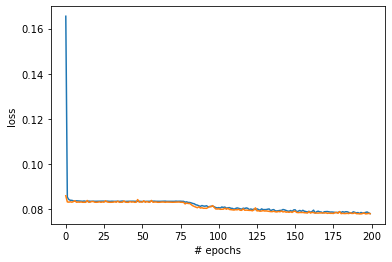

In [13]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [14]:
model.save('model_new')

INFO:tensorflow:Assets written to: model_new\assets


INFO:tensorflow:Assets written to: model_new\assets


In [16]:
import joblib

joblib.dump(scaler_data,'scaler_data.sav')
joblib.dump(scaler_target,'scaler_target.sav')

['scaler_target.sav']